# Loading data

In [55]:
print('Importing required libraries ...')
print('-'*30)
import sys
print('Python version:', format(sys.version))
import pandas as pd
print('pandas version:', format(pd.__version__))
import matplotlib.pyplot as plt
import matplotlib
print('Matplotlib version:', format(matplotlib.__version__))
import numpy as np
print('Numpy version:', format(np.__version__))
import seaborn as sns
print('Seaborn version:', format(sns.__version__))
import scipy as sp
print('SciPy version:', format(sp.__version__))
import sklearn
print('scikit-learn version:', format(sklearn.__version__))
import random
import time

import warnings
warnings.filterwarnings('ignore')
print('-'*30)
print('Libraries imported.')

Importing required libraries ...
------------------------------
Python version: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
pandas version: 2.2.0
Matplotlib version: 3.8.2
Numpy version: 1.26.3
Seaborn version: 0.13.2
SciPy version: 1.12.0
scikit-learn version: 1.4.0
------------------------------
Libraries imported.


In [56]:
# importing functions from libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import string

In [57]:
test = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')
print(data.shape, test.shape)


(891, 12) (418, 11)


We have the required format of the data needed <br>

# Pre-processing

In [58]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S


In [59]:
df = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


comparing the sample of data & the info, we can suggest the following : <br>
- PassengerID can be dropped. Or use it an an index to call a perticular case.<br>
- Name can be replaced with just Surname. <br>
- Sex can be converted to binary ( 0 or 1)<br>
- Fair misses only one value hence dropping it.<br>
- Embarked misses only two value hence dropping it.<br>
- Survived is the target variable<br> 


In [60]:
data.dropna(subset=['Fare', 'Embarked'],inplace=True)
data.describe(include='all').T.sort_values(by='count', ascending=False)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,889.0,NaN,NaN,NaN,446.0,256.998173,1.0,224.0,446.0,668.0,891.0
Survived,889.0,NaN,NaN,NaN,0.382452,0.48626,0.0,0.0,0.0,1.0,1.0
Pclass,889.0,NaN,NaN,NaN,2.311586,0.8347,1.0,2.0,3.0,3.0,3.0
Name,889,889,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,889,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,889.0,NaN,NaN,NaN,0.524184,1.103705,0.0,0.0,0.0,1.0,8.0
Parch,889.0,NaN,NaN,NaN,0.382452,0.806761,0.0,0.0,0.0,0.0,6.0
Ticket,889,680,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,889.0,NaN,NaN,NaN,32.096681,49.697504,0.0,7.8958,14.4542,31.0,512.3292
Embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see some of the values are missing which need to be handled. 
 - Cabin has a lot of missing values. Hence, we can drop it.
 - Age has a few missing values may be we can impute it.
 - Ticket is non-numeric and it doesnt exactly explain how it is related to survival. Need to convert it in to useful indicator.

In [61]:
data.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

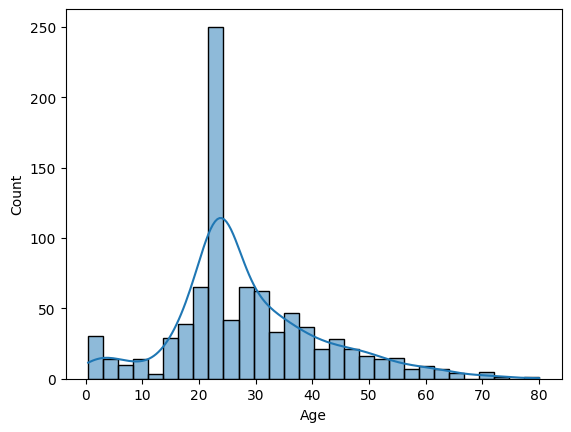

In [62]:
# Filling missing values in Age
data['Age'].fillna(0, inplace=True)
data.loc[data['Age'] == 0, 'Age'] = data['Age'].mean()
sns.histplot(data['Age'], kde=True)

In [63]:
data['Age'] = data['Age'].astype(int)

<Axes: xlabel='Age', ylabel='Fare'>

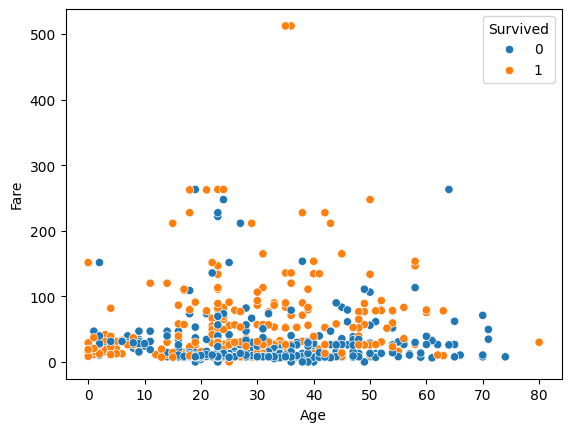

In [64]:
# visualization of Survived with top two features 
sns.scatterplot(x=data['Age'], y=data['Fare'], hue = data['Survived'])

Looking at the scatterplot we can suggest : 
1. High fare = high survival ( it filps for low Fare)
2. Low Fare -> if age < 18 then Suvives else Doesnt survive.

In [65]:
pd.DataFrame(data[data['Age'] >= 55]['Survived'].value_counts())

,count
Survived,
0,29
1,12


In [66]:
pd.DataFrame(data[data['Age']<=5]['Survived'].value_counts())

,count
Survived,
1,31
0,13


In [67]:
# Normalizing the data by dropping rows that look like outliers
data.drop(data[(data['Age'] <=5) | (data['Age'] >= 55)].index, inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

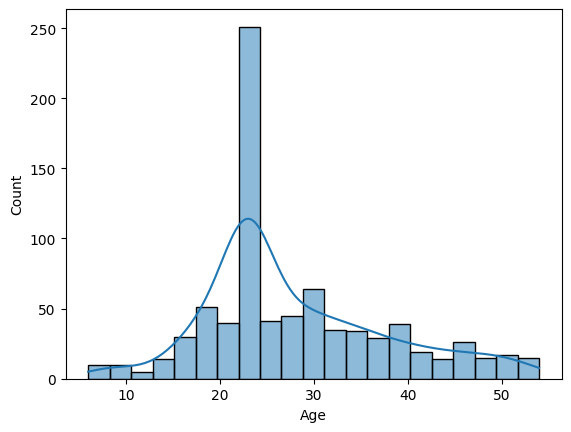

In [68]:
sns.histplot(data['Age'], kde=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


<Axes: xlabel='Fare', ylabel='Count'>

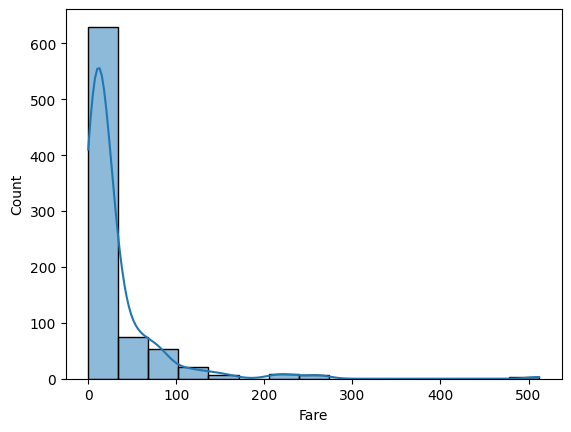

In [70]:
data['Fare'] = data['Fare'].astype(int)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Fare'] = test['Fare'].astype(int)
data['Fare'].fillna(0, inplace=True)

sns.histplot(data['Fare'], kde=True, bins=15)

Graph shows Fare is right skewed

In [71]:
# identifyling if Fare > 200 can predict survival
pd.DataFrame(data[data['Fare'] >= 200]['Survived'].value_counts())

,count
Survived,
1,14
0,5


clearly higher fare has higher chance of survival.<br>
This tells a story how higher fare stay in higher decks and have not been impacted by the time required to move to the boots<br>
Binning fare into groups can make the model predict better.<br>

<Axes: xlabel='Survived', ylabel='Parch'>

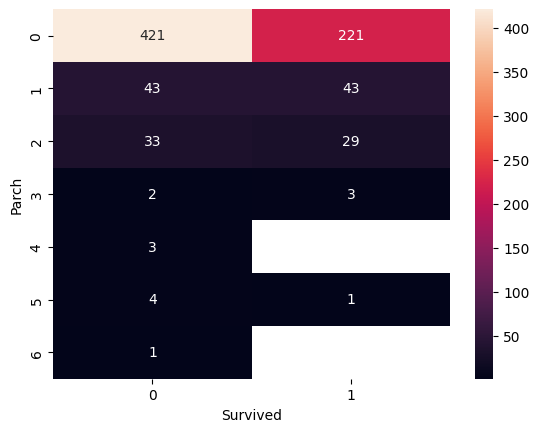

In [72]:
sns.heatmap(data[['Survived', 'Parch']].value_counts().unstack().T, annot=True, fmt= '.0f')

If Parch is 6 or 9 then the probability of survival is difficult to be dertriminated.<br>
If parch is 1,2,3 then the model has to use alternate feature to determine survival .

In [73]:
# Parch 6 & 9 doesnt give any valuble information about survival so droping them
data.drop(data[(data['Parch'] == 6) | (data['Parch'] == 9)].index, inplace=True)


<Axes: xlabel='Survived', ylabel='Family_size'>

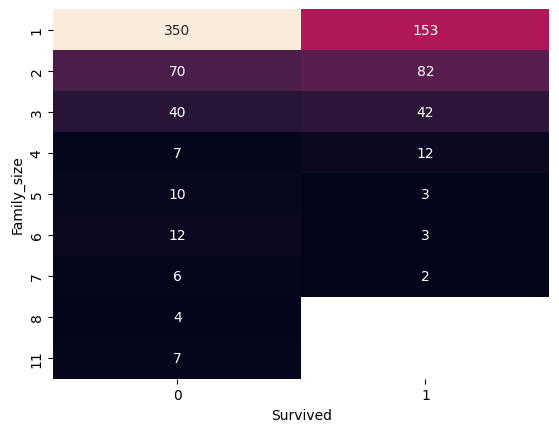

In [74]:
# addition of new variable Family 
data['Family_size'] = data['SibSp'] + data['Parch'] + 1
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
# identifying if Family is related to survival
sns.heatmap(data[['Survived', 'Family_size']].value_counts().unstack().T, annot=True, fmt= '.0f', cbar=False)

Except for 3 & 2 size of family the diffrence between survival & Non-survival is high.

<Axes: xlabel='Sex', ylabel='Survived'>

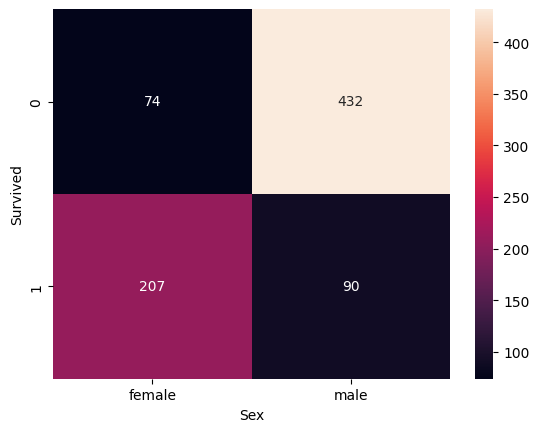

In [75]:
sns.heatmap(data[['Survived', 'Sex']].value_counts().unstack(), annot=True, fmt= '.0f')
# clear differentiation between male and female for survival is seen

In [76]:
# Feature Engineering
# Converting Categorical Variables into Numerical
data['Sex'] = pd.factorize(data['Sex'])[0]
test['Sex'] = pd.factorize(test['Sex'])[0]
data['Embarked'] = pd.factorize(data['Embarked'])[0]
test['Embarked'] = pd.factorize(test['Embarked'])[0]

Age can be converted into grops to simplify the data.

In [77]:
import pandas as pd

# Define the age bins
age_bins = [0, 10, 20, 30, 40, 50, 60]

# Fill missing values in 'Age' with the mean for both 'data' and 'test'
data['Age'].fillna(data['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# Convert 'Age' to integer after filling missing values for both 'data' and 'test'
data['Age'] = data['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

# Create 'Age_group' based on age bins for both 'data' and 'test'
# columns names should be same
data['Age_group'] = pd.cut(data['Age'], age_bins, labels=['0', '1', '2', '3', '4', '5']).astype(int)

# Handle missing values 
test['Age_group'] = pd.cut(test['Age'], age_bins, labels=['0', '1', '2', '3', '4', '5'])
test['Age_group'] = test['Age_group'].cat.add_categories([-1])  
test['Age_group'].fillna(-1, inplace=True)
test['Age_group'] = test['Age_group'].astype(int)

# Drop the original 'Age' column 
data.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

Text(0.5, 1.0, 'Survival Distribution')

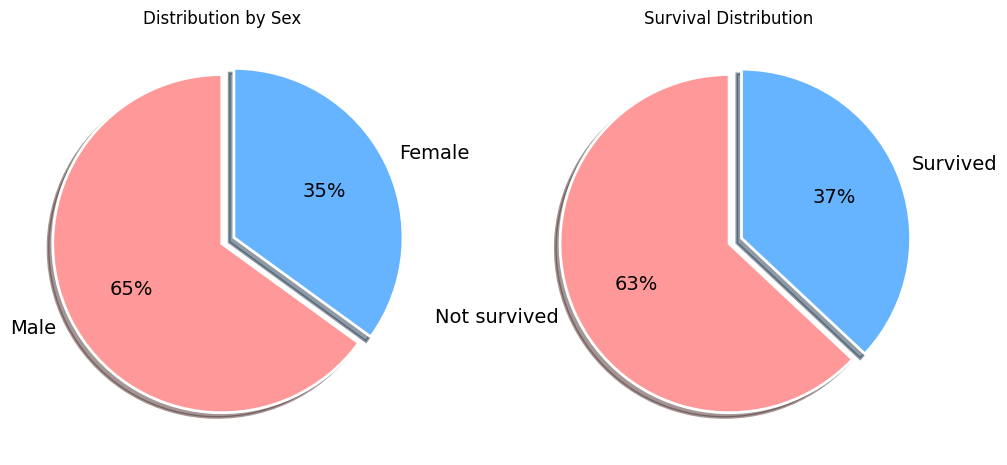

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sex_counts = data['Sex'].value_counts()
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.0f%%', colors=['#ff9999', '#66b3ff'], startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, shadow=True, textprops={'fontsize': 14}, explode=[0, 0.08])
plt.title('Distribution by Sex')

# Pie chart for 'Survived'
plt.subplot(1, 2, 2)
survived_counts = data['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not survived', 'Survived'], autopct='%1.0f%%', colors=['#ff9999', '#66b3ff'], startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, shadow=True, textprops={'fontsize': 14}, explode=[0, 0.08])
plt.title('Survival Distribution')


Survival graph verly closely resembles Sex distribution.

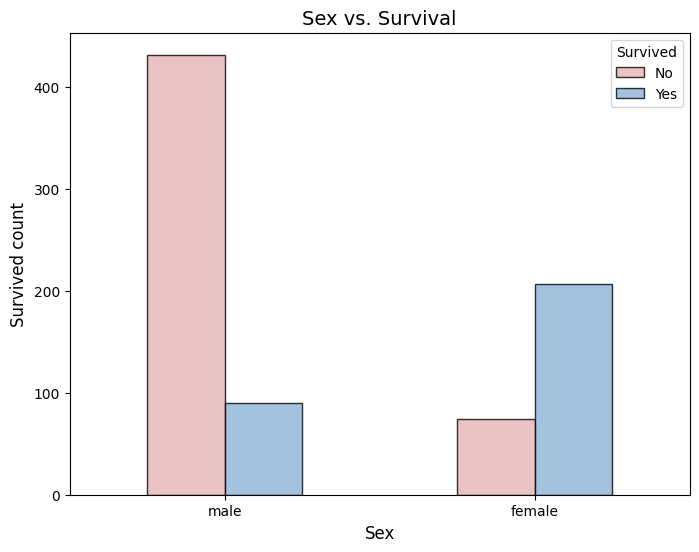

In [79]:
# looking at most correlated features with target
data_2 = data.copy()
data_2['Sex'] = data_2['Sex'].map({0: 'male', 1: 'female'})
data_2['Survived'] = data_2['Survived'].map({1: 'yes', 0: 'no'})
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data_2, palette=['#ff9999', '#66b3ff'], edgecolor='black', width=0.5, alpha=0.8, saturation=0.5)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survived count', fontsize=12)
plt.title('Sex vs. Survival', fontsize=14)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# data exploration (EDA)

In [80]:
correlation = data.corr(numeric_only=True)
correlation.sort_values(by='Survived', ascending=False, inplace=True)
correlation.index
# ordering the features in descending order of correlation

Index(['Survived', 'Sex', 'Fare', 'Embarked', 'Parch', 'Age_group',
       'Family_size', 'PassengerId', 'SibSp', 'Pclass'],
      dtype='object')

<Axes: >

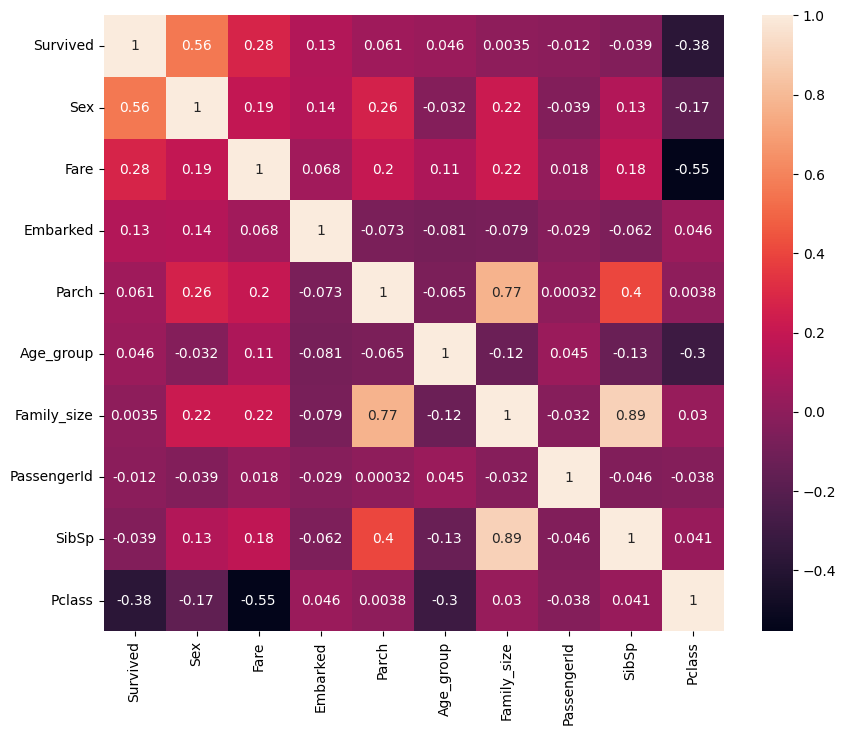

In [81]:
# data has some correlation like may be the Fare of the passenger and Embarked.
corr_data = data[['Survived', 'Sex', 'Fare', 'Embarked', 'Parch', 'Age_group',
       'Family_size', 'PassengerId', 'SibSp', 'Pclass']]
correlation = corr_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)

Negative correlation is still relevant as they go in opposite direction.<br>
Family has placed itself between Parch & SibSp meaning correlation has been the avarage of both.<br>
Least correlated to survival is SibSp.<br>

<Axes: xlabel='Survived', ylabel='SibSp'>

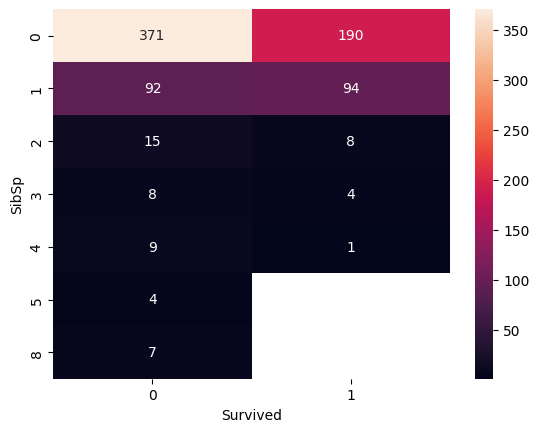

In [82]:
sns.heatmap(data[['Survived', 'SibSp']].value_counts().unstack().T, annot=True, fmt= '.0f')

If Sibsp is 1 then the probability of survival is difficult to be determined between 135:136<br>
But in all other cases it is more likely not to survive<br>
So, we can consider to still keep the feature to support our prediction<br>

In [83]:
data[['Sex', 'Survived']].groupby(['Sex']).value_counts().unstack().T

Sex,0,1
Survived,,
0,432,74
1,90,207


<Axes: xlabel='Age_group', ylabel='count'>

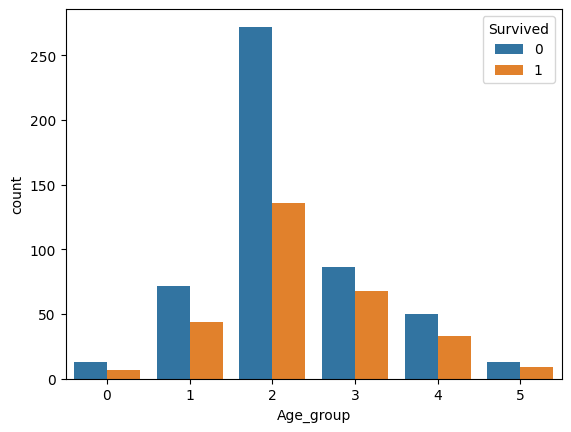

In [84]:
# looking at most correlated features with target
sns.countplot(x='Age_group',hue='Survived', data=data)

It shows that most Men didnt survive ( Sex:0, Survived :0) and most women survived.<br>
This tells the story how preference might have been given to women.<br>
For age group - age between 18 & 48 survived the most. <br>
Also can be an easy differenciator with higher probability of not surviving for men and surviving wfor women.<br>

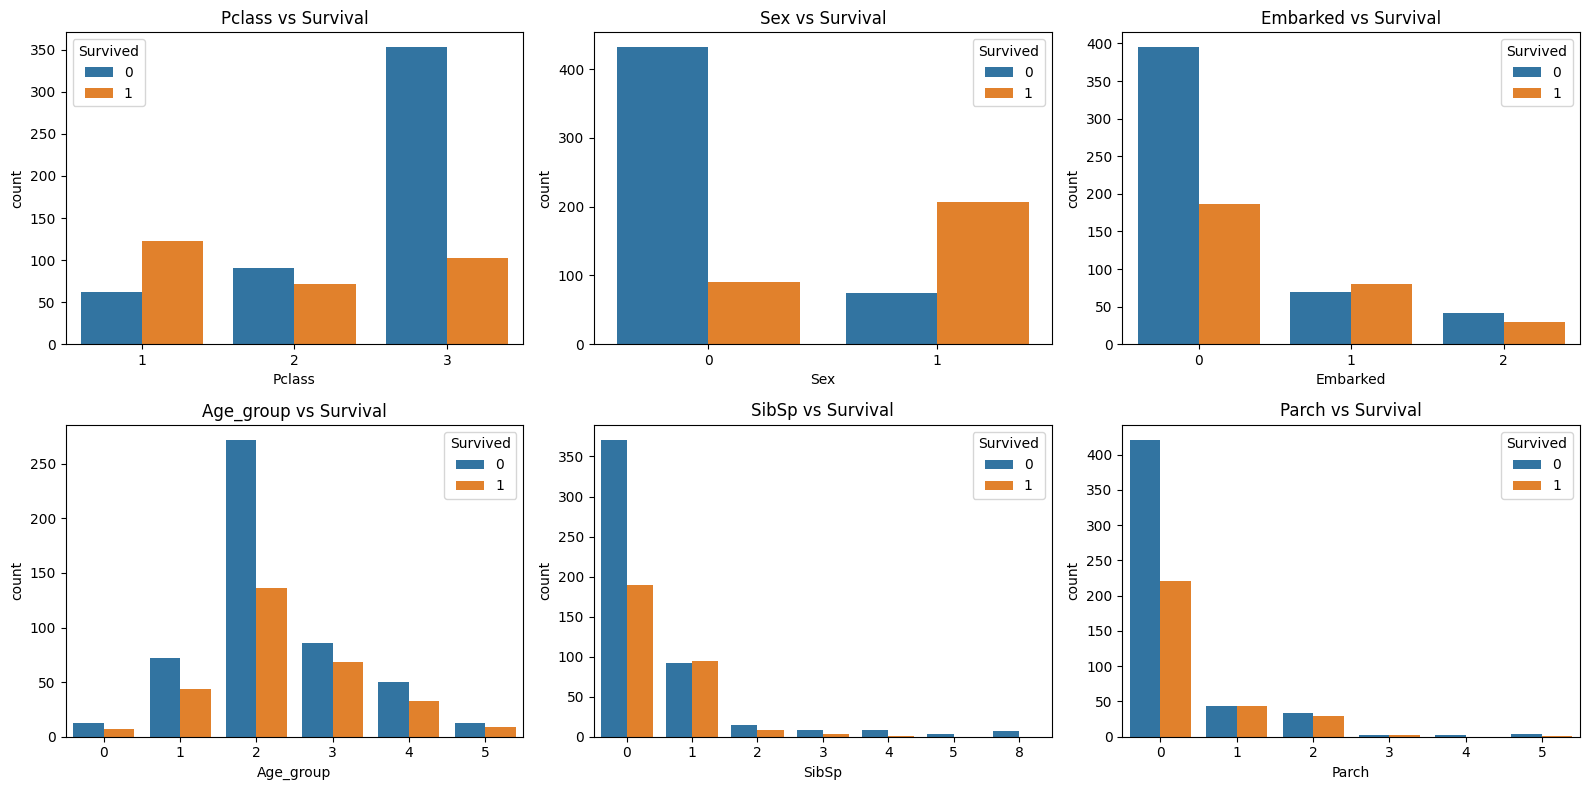

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
columns = ['Pclass', 'Sex', 'Embarked', 'Age_group', 'SibSp', 'Parch']
for i, col in enumerate(columns):
    sns.countplot(x=col, hue='Survived', data=data, ax=axes[i // 3, i % 3]) 
    axes[i // 3, i % 3].set_title(f'{col} vs Survival')

plt.tight_layout()
plt.show()

In [86]:
#scaling the data
scaler = StandardScaler()
data[[ 'Parch', 'Age_group','Family_size', 'SibSp']] = scaler.fit_transform(data[[ 'Parch', 'Age_group','Family_size', 'SibSp']])
test[['Parch', 'Age_group','Family_size', 'SibSp']] = scaler.fit_transform(test[[ 'Parch', 'Age_group','Family_size', 'SibSp']])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  803 non-null    int64  
 1   Survived     803 non-null    int64  
 2   Pclass       803 non-null    int64  
 3   Name         803 non-null    object 
 4   Sex          803 non-null    int64  
 5   SibSp        803 non-null    float64
 6   Parch        803 non-null    float64
 7   Ticket       803 non-null    object 
 8   Fare         803 non-null    int32  
 9   Embarked     803 non-null    int64  
 10  Family_size  803 non-null    float64
 11  Age_group    803 non-null    float64
dtypes: float64(4), int32(1), int64(5), object(2)
memory usage: 78.4+ KB


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   SibSp        418 non-null    float64
 5   Parch        418 non-null    float64
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    int32  
 8   Embarked     418 non-null    int64  
 9   Family_size  418 non-null    float64
 10  Age_group    418 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 34.4+ KB


# One Hot encoding

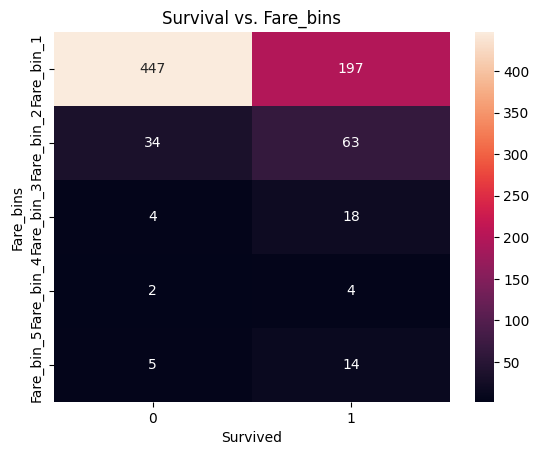

In [89]:
Fare_bins = [0, 50, 100, 150, 200, float('inf')]  
Fare_columns = ['Fare_bin_1', 'Fare_bin_2', 'Fare_bin_3', 'Fare_bin_4', 'Fare_bin_5']
data['Fare_bins'] = pd.cut(data['Fare'], Fare_bins,labels = Fare_columns)
test['Fare_bins'] = pd.cut(test['Fare'], Fare_bins,labels = Fare_columns)

# Drop the original 'Fare' column
data.drop(['Fare'], axis=1, inplace=True)
test.drop(['Fare'], axis=1, inplace=True)


# Convert 'Fare_bins' to a category type
data['Fare_bins'] = data['Fare_bins'].astype('category')

# Create a heatmap
sns.heatmap(data[['Survived', 'Fare_bins']].value_counts().unstack().T, annot=True, fmt='.0f')
plt.xlabel('Survived')
plt.ylabel('Fare_bins')
plt.title('Survival vs. Fare_bins')
plt.show()


In [90]:
data = pd.get_dummies(data, columns=['Fare_bins'], drop_first=True)
test = pd.get_dummies(test, columns=['Fare_bins'], drop_first=True)

In [91]:
def extract_surname(data):    
    families = []
    
    for i in range(len(data)):  
        name = data.iloc[i]
        if '(' in name:
            name_no_brac = name.split('(')[0] 
        else:
            name_no_brac = name            
        family = name_no_brac.split(',')[0]
        title = name_no_brac.split(',')[1].strip().split(' ')[0]

        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
            
    return families

data['Family'] = extract_surname(data['Name'])
test['Family'] = extract_surname(test['Name'])

Looking at this result we have different ratios of survival. but if the train data has over filtting theren there is possibility of going wrong. <br>
Generally we can consider based on the above result may be Family can be a good classifier.<br>

In [92]:
# Combine 'data' and 'test' DataFrames for equal number fo columns
combined_data = pd.concat([data, test], axis=0, ignore_index=True)

# Apply one-hot encoding to the 'Family' column in the combined DataFrame
one_hot_encoded_combined = pd.get_dummies(combined_data['Family'])

# Concatenate the one-hot encoded columns to the combined DataFrame
combined_data = pd.concat([combined_data, one_hot_encoded_combined], axis=1)

# Split the combined DataFrame back into 'data' and 'test' DataFrames
data = combined_data.iloc[:len(data)]
test = combined_data.iloc[len(data):]

print(data.shape, test.shape)

(803, 861) (418, 861)


In [93]:
test.drop('Survived', axis=1, inplace=True)

In [94]:
data = data.drop(['Name', 'Family'], axis = 1)
test = test.drop(['Name', 'Family'], axis = 1)

In [95]:
data['Ticket'].fillna('UNKNOWN', inplace=True)
data['Ticket_type'] = data['Ticket'].apply(lambda x: x[0:3])
data['Ticket_type'] = data['Ticket_type'].astype('category')
data['Ticket_type'] = data['Ticket_type'].cat.codes
test['Ticket'].fillna('UNKNOWN', inplace=True)
test['Ticket_type'] = test['Ticket'].apply(lambda x: x[0:3])
test['Ticket_type'] = test['Ticket_type'].astype('category')
test['Ticket_type'] = test['Ticket_type'].cat.codes

In [96]:
data.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

# building models

In [97]:
# Splitting the data into train, test and validation
X=data.drop(columns=['Survived'], axis=1)
y=data['Survived']

# splitting the data into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=23)
print(X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape)

(642, 858) (80, 858) (81, 858) (642,) (80,) (81,)


In [98]:
print("Data description:")
print('-'*35)
print('Train:\t\t\t\t', X_train.shape[0])
print('Test:\t\t\t\t', X_test.shape[0])
print('Validation:\t\t\t', X_valid.shape[0])
print('\nNumber of features:', X_train.shape[1])
print('Number of examples per class:')
print("Class 0:\t\t\t", (y_train == 0).sum())
print("Class 1:\t\t\t", (y_train == 1).sum())
print("\nDescriptive statistics:")

for col in ['Survived', 'Sex', 'Embarked', 'Parch', 'Age_group','Family_size', 'PassengerId', 'SibSp', 'Pclass']:
    print (col,"\n\tmean:\t\t\t{:.2f}".format(data[col].mean()), "\n\tmedian:\t\t\t{:.2f}".format(data[col].median()), "\n\tStandard deviation:\t{:.2f}".format(data[col].std()))
print('-'*35)

Data description:
-----------------------------------
Train:				 642
Test:				 80
Validation:			 81

Number of features: 858
Number of examples per class:
Class 0:			 416
Class 1:			 226

Descriptive statistics:
Survived 
	mean:			0.37 
	median:			0.00 
	Standard deviation:	0.48
Sex 
	mean:			0.35 
	median:			0.00 
	Standard deviation:	0.48
Embarked 
	mean:			0.36 
	median:			0.00 
	Standard deviation:	0.64
Parch 
	mean:			-0.00 
	median:			-0.43 
	Standard deviation:	1.00
Age_group 
	mean:			0.00 
	median:			-0.28 
	Standard deviation:	1.00
Family_size 
	mean:			-0.00 
	median:			-0.52 
	Standard deviation:	1.00
PassengerId 
	mean:			448.97 
	median:			448.00 
	Standard deviation:	256.27
SibSp 
	mean:			-0.00 
	median:			-0.45 
	Standard deviation:	1.00
Pclass 
	mean:			2.34 
	median:			3.00 
	Standard deviation:	0.83
-----------------------------------


In [99]:
# Model 1: Logistic Regression (linear)
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'max_iter': [100,500]}, cv=5)
grid_lr.fit(X_train, y_train)
lr = grid_lr.best_estimator_
lr.fit(X_train, y_train)


LogisticRegression(C=1)

In [ ]:
#Model 2 : Random Forest (non-linear)
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'oob_score': [True, False], 'max_features': ['auto', 'sqrt', 'log2']}, cv=5)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_estimator_
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       n_estimators=10)

In [ ]:
#Model 3 : XGBoost (non-linear)
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.05], 'booster': ['gbtree', 'gblinear', 'dart']}, cv=5)
grid_xgb.fit(X_train, y_train)
xgb = grid_xgb.best_estimator_
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
# Model 4 : HistGradientBoostingClassifier (non-linear)
hgbc = HistGradientBoostingClassifier()
grid_hgbc = GridSearchCV(hgbc, param_grid={'learning_rate': [0.1, 0.05], 'max_iter': [100, 200], 'max_depth': [5, 10, 15]}, cv=5)
grid_hgbc.fit(X_train, y_train)
hgbc = grid_hgbc.best_estimator_
hgbc.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [ ]:
# corss validation for test data
print('Cross validation on train data')
print('-'*35)
print('Model 1: Logistic Regression(linear)')
print('\tTrain score : {:.2f}'.format(cross_val_score(lr, X_train, y_train, cv=5).mean()))
print('\nModel 2: Random Forest(Non-linear)')
print('\tTrain score : {:.2f}'.format(cross_val_score(rf, X_train, y_train, cv=5).mean()))
print('\nModel 3: XGBoost(non-linear)')
print('\tTrain score : {:.2f}'.format(cross_val_score(xgb, X_train, y_train, cv=5).mean()))
print('\nModel 4: HistGradient Boosting(Non-linear)')
print('\tTrain score : {:.2f}'.format(cross_val_score(hgbc, X_train, y_train, cv=5).mean()))

Cross validation on train data
-----------------------------------
Model 1: Logistic Regression(linear)


	Train score : 0.81

Model 2: Random Forest(Non-linear)
	Train score : 0.79

Model 3: XGBoost(non-linear)
	Train score : 0.82

Model 4: HistGradient Boosting(Non-linear)
	Train score : 0.82


In [ ]:
# verifying for Validation data performance
print('Model 1: Logistic Regression(linear)')
print('\tValidation score:{:.2f}'.format(lr.score(X_valid, y_valid)))
print('\nModel 2: Random Forest(Non-linear)')
print('\tValidation score:{:.2f}'.format(rf.score(X_valid, y_valid)))
print('\nModel 3: XGBoost(non-linear)')
print('\tValidation score:{:.2f}'.format(xgb.score(X_valid, y_valid)))
print('\nModel 4: HistGradient Boosting(Non-linear)')
print('\tValidation score:{:.2f}'.format(hgbc.score(X_valid, y_valid)))

Model 1: Logistic Regression(linear)
	Validation score:0.81

Model 2: Random Forest(Non-linear)
	Validation score:0.69

Model 3: XGBoost(non-linear)
	Validation score:0.80

Model 4: HistGradient Boosting(Non-linear)
	Validation score:0.81


Hence Logistic Regression is considered the best model with Validation prediction of 81%

In [ ]:
print("result:")
print('-'*35)
print('Model 1: Logistic Regression(linear)')
print('Accuracy : {:.2f}'.format(lr.score(X_test, y_test)))
print('F1 score : {:.2f}'.format(f1_score(y_test, lr.predict(X_test))))
print('AUC score : {:.2f}'.format(roc_auc_score(y_test, lr.predict(X_test))))
print('\nModel 2: Random Forest(non-linear)')
print('Accuracy : {:.2f}'.format(rf.score(X_test, y_test)))
print('F1 score : {:.2f}'.format(f1_score(y_test, rf.predict(X_test))))
print('AUC score : {:.2f}'.format(roc_auc_score(y_test, rf.predict(X_test))))
print('\nModel 3: XGBoost(non-linear)')
print('Accuracy : {:.2f}'.format(xgb.score(X_test, y_test)))
print('F1 score : {:.2f}'.format(f1_score(y_test, xgb.predict(X_test))))
print('AUC score : {:.2f}'.format(roc_auc_score(y_test, xgb.predict(X_test))))
print('\nModel 4: History Gradient Boosting Classifier(non-linear)')
print('Accuracy : {:.2f}'.format(hgbc.score(X_test, y_test)))
print('F1 score : {:.2f}'.format(f1_score(y_test, hgbc.predict(X_test))))
print('AUC score : {:.2f}'.format(roc_auc_score(y_test, hgbc.predict(X_test))))
print('-'*35)


result:
-----------------------------------
Model 1: Logistic Regression(linear)
Accuracy : 0.84
F1 score : 0.83
AUC score : 0.84

Model 2: Random Forest(non-linear)
Accuracy : 0.76
F1 score : 0.71
AUC score : 0.76

Model 3: XGBoost(non-linear)
Accuracy : 0.82
F1 score : 0.79
AUC score : 0.82

Model 4: History Gradient Boosting Classifier(non-linear)
Accuracy : 0.84
F1 score : 0.82
AUC score : 0.84
-----------------------------------


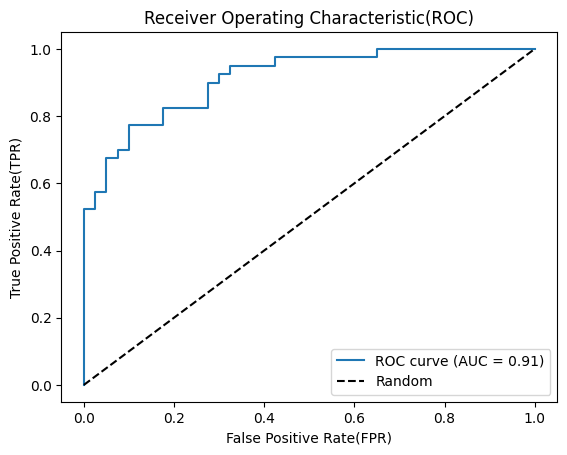

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        40
         1.0       0.89      0.78      0.83        40

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [109]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': lr.predict(test).astype(int)
})
submission

,PassengerId,Survived
803,892,0
804,893,0
805,894,0
806,895,0
807,896,0
...,...,...
1216,1305,0
1217,1306,1
1218,1307,0
1219,1308,0


In [110]:
submission.to_csv('submission.csv', index=False)

In [114]:
# improving with total data set.
# Model 1: Logistic Regression(linear) with the best parameters set.
lr.fit(X,y)
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': lr.predict(test).astype(int)
})

# overwriting submission file.
submission.to_csv('submission.csv', index=False)